In [1]:
import wrangle_zillow
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

In [6]:
zillow = wrangle_zillow.acquire_zillow()

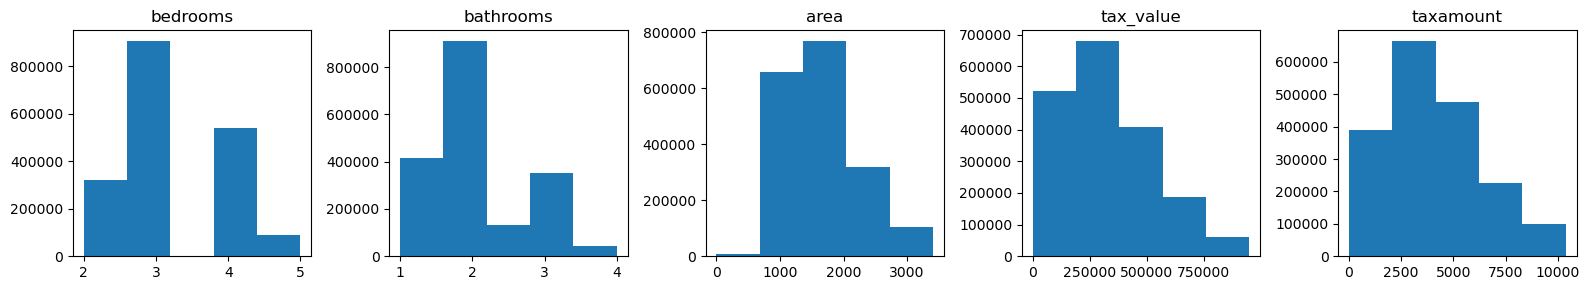

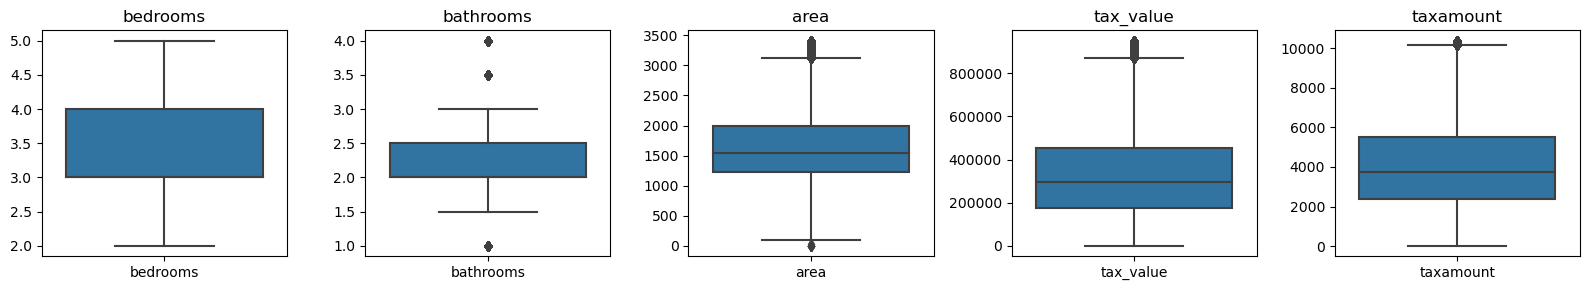

In [10]:
train, validate, test = wrangle_zillow.prepare_zillow(zillow)

In [11]:
train

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0
...,...,...,...,...,...,...,...
991122,3.0,1.0,1199.0,280857.0,1951.0,3282.40,6111.0
1707759,4.0,2.0,1859.0,95008.0,1961.0,1463.61,6037.0
1770246,3.0,3.0,2132.0,158470.0,1980.0,2037.38,6037.0
1500741,2.0,1.0,780.0,477167.0,1955.0,6509.69,6037.0


Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [14]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [16]:
train_scaled = scaler.transform(train)
validate_scaled= scaler.transform(validate)
test_scaled = scaler.transform(test)

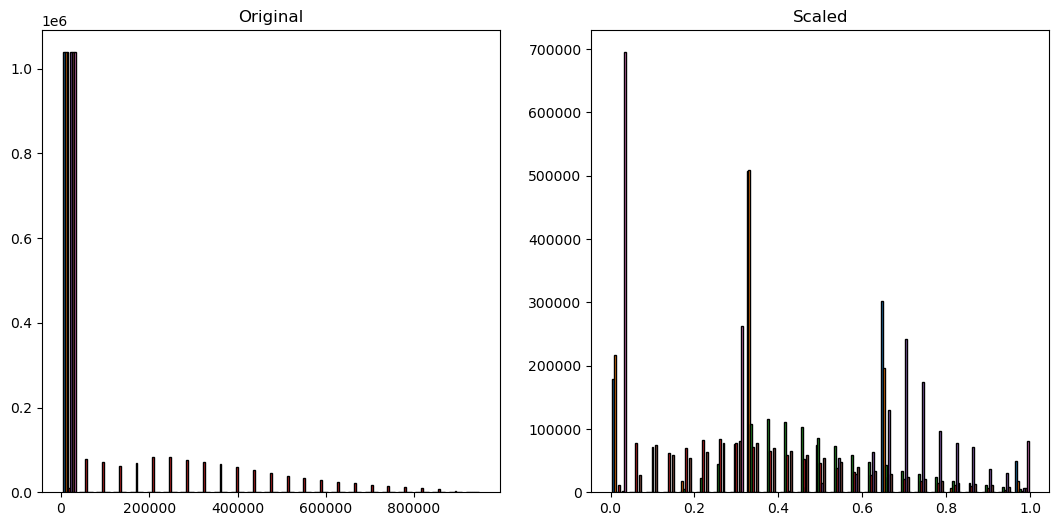

In [19]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [26]:
train_scaled

array([[7.00000000e+00, 3.00000000e+00, 1.18010300e+06, ...,
        4.73360000e+04, 7.82171920e+06, 1.39335000e+05],
       [6.00000000e+00, 3.00000000e+00, 1.33789800e+06, ...,
        4.70370000e+04, 5.22300176e+06, 1.38851000e+05],
       [5.00000000e+00, 2.50000000e+00, 1.09780800e+06, ...,
        4.67150000e+04, 4.09591378e+06, 1.38851000e+05],
       ...,
       [6.00000000e+00, 3.50000000e+00, 1.61120800e+06, ...,
        4.74970000e+04, 6.36382520e+06, 1.38851000e+05],
       [5.00000000e+00, 2.50000000e+00, 5.90448000e+05, ...,
        4.69220000e+04, 2.03250130e+07, 1.38851000e+05],
       [6.00000000e+00, 2.50000000e+00, 8.56208000e+05, ...,
        4.60250000e+04, 1.11286868e+07, 1.38851000e+05]])

In [20]:
pd.DataFrame(train_scaled,index=train.index,columns=train.columns)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,0.666667,0.333333,0.457612,0.261030,0.789216,0.239843,0.297297
2004970,0.333333,0.333333,0.518921,0.092929,0.725490,0.159469,0.000000
306031,0.000000,0.000000,0.425638,0.085335,0.656863,0.124610,0.000000
1038595,0.333333,0.000000,0.293048,0.125302,0.676471,0.181516,0.000000
270959,0.333333,0.333333,0.578762,0.454557,0.862745,0.511229,0.000000
...,...,...,...,...,...,...,...
991122,0.333333,0.000000,0.351423,0.295330,0.681373,0.314958,1.000000
1707759,0.666667,0.333333,0.545028,0.099889,0.730392,0.139356,0.000000
1770246,0.333333,0.666667,0.625110,0.166626,0.823529,0.194752,0.000000
1500741,0.000000,0.000000,0.228513,0.501773,0.700980,0.626548,0.000000


In [21]:
train.shape

(1038959, 7)

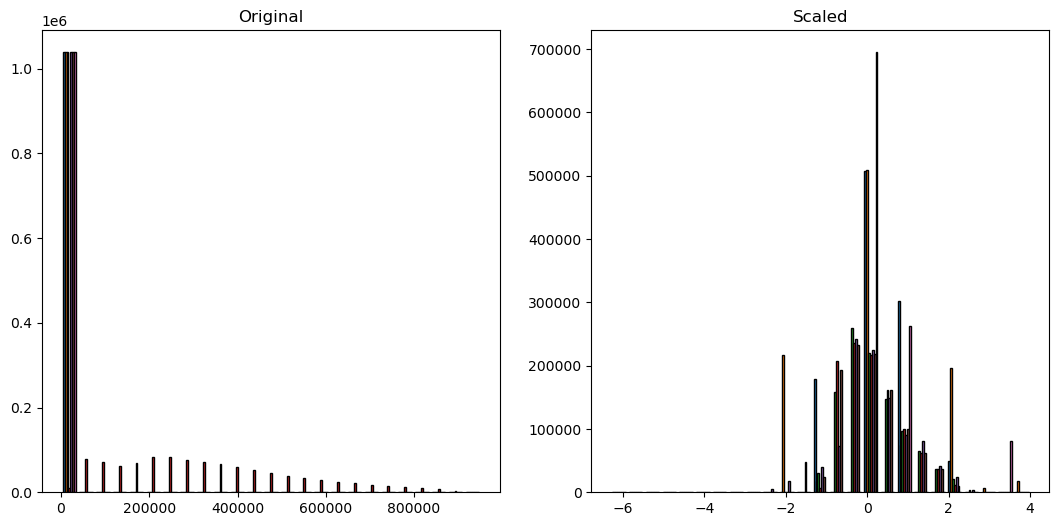

In [23]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [24]:
train_scaled = scaler.inverse_transform(train)
validate_scaled = scaler.inverse_transform(validate)
test_scaled = scaler.inverse_transform(test)

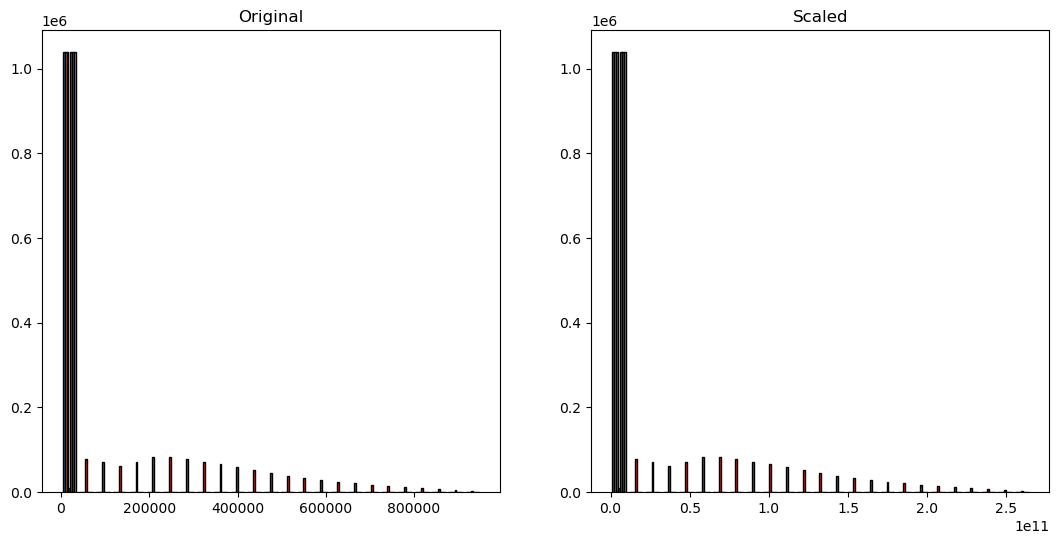

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [27]:
train.isna().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64